# Coronavirus Forecast
A simple Python script to forecast the emergence of COVID-19 cases in different countries based on a logistic model

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import scipy.optimize as opt

from importnb import Notebook
with Notebook(): 
    import coronavirus_data

## Get data for a number of places and do some pre-processing

In [2]:
places = [
    'Hubei',
    'Germany',
    'Italy',
    'Netherlands'
]
dataset = [np.array(coronavirus_data.get_series(place, 'Confirmed')) for place in places]
index = np.arange(len(dataset[0]))
average = np.average(dataset, axis=0)

## Define some more data for places and approximations

In [3]:
inhabitants = [
    58.5*10**6,
    82.79*10**6,
    60.48*10**6,
    17.18*10**6
]
fraction = 0.00116 # Ratio between confirmed cases and inhabitants at the end of the modelled period (assuming there is only a single wave)
duration = 14 # Duration of infection/Days after which the cases become non-active (either due to recovery or death)
time = 100 # Number of days to model

## Investigate places seperately

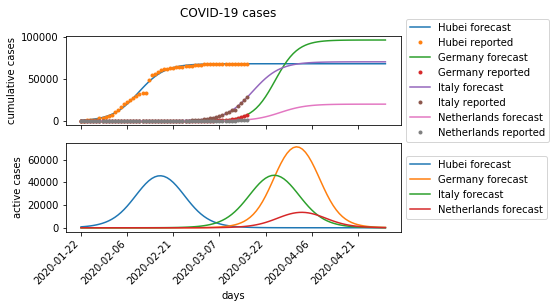

In [4]:
fig, axs = plt.subplots(2)
plt.suptitle('COVID-19 cases')

for i in range(len(places)):
    
    def logistic_model(x,a,b):
        return inhabitants[i]*fraction/(1+np.exp(-(x-b)/a))
    fit = opt.curve_fit(logistic_model, index, dataset[i])
    
    cumulative = np.array([logistic_model(j, fit[0][0], fit[0][1]) for j in np.arange(100)])
    decay = np.array([logistic_model(j-duration, fit[0][0], fit[0][1]) for j in np.arange(100)])
    active = (cumulative-decay)
    
    axs[0].plot(np.arange(time), cumulative,
               label='{} forecast'.format(places[i]))
    axs[0].plot(index, dataset[i], marker = '.', linestyle = 'None',
               label='{} reported'.format(places[i]))
    
    axs[1].plot(np.arange(time), active,
               label='{} forecast'.format(places[i]))


for ax in axs:
    ax.set_xlabel('days')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    def to_date(x, pos, today=datetime.datetime.strptime(coronavirus_data.get_series(places[0], 'Confirmed').index[0], '%m/%d/%y').date()):
        return today+datetime.timedelta(days=x)
    fmt = tic.FuncFormatter(to_date)
    ax.xaxis.set_major_formatter(fmt)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    fig.autofmt_xdate(rotation=45)

axs[0].set_ylabel('cumulative cases')
axs[1].set_ylabel('active cases')
plt.show()